In [1]:
import pandas as pd
import numpy as np

In [2]:
Columns = ['sentiments','text']
sentiment_df = pd.read_csv(r'E:\Work_files\Unified_assignment/sentiment (1).tsv',sep='\t',names=Columns)

In [3]:
sentiment_df.head()

,sentiments,text
0,neg,"@jamielewislewis i cant believe it, it really ..."
1,pos,having a vodka tonic and looking forward to go...
2,pos,@ddlovatofans1neg1 Could you follow me please....
3,pos,@jordanknight for once.................. PLEAS...
4,neg,Had a dream about a walk in fast food resturau...


In [4]:
import re

# function to remove user handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

# remove user handles
sentiment_df['clean_text'] = sentiment_df['text'].apply(lambda row:remove_pattern(row, "@[\w]*"))


# first five observations
sentiment_df.head()

,sentiments,text,clean_text
0,neg,"@jamielewislewis i cant believe it, it really ...","i cant believe it, it really doesnt belong th..."
1,pos,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...
2,pos,@ddlovatofans1neg1 Could you follow me please....,Could you follow me please.I would really app...
3,pos,@jordanknight for once.................. PLEAS...,for once.................. PLEASE TELL US WHY...
4,neg,Had a dream about a walk in fast food resturau...,Had a dream about a walk in fast food resturau...


In [5]:
from nltk.corpus import stopwords

import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...",".", "n't","*"]

# tokenize
sentiment_df['tokenized_text'] = [nltk.word_tokenize(x) for x in sentiment_df['clean_text']]

# stopword removal
sentiment_df['tokenized_text'] = sentiment_df['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = PorterStemmer()
sentiment_df['tokenized_text'] = sentiment_df['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
sentiment_df['tokenized_text'] = sentiment_df['tokenized_text'].apply(lambda x: ' '.join(x))

sentiment_df.head()

,sentiments,text,clean_text,tokenized_text
0,neg,"@jamielewislewis i cant believe it, it really ...","i cant believe it, it really doesnt belong th...",cant believ realli doesnt belong hope doesnt r...
1,pos,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...,vodka tonic look forward go saddl ranch westga...
2,pos,@ddlovatofans1neg1 Could you follow me please....,Could you follow me please.I would really app...,could follow please.i would realli appreci
3,pos,@jordanknight for once.................. PLEAS...,for once.................. PLEASE TELL US WHY...,pleas tell US whi u think person
4,neg,Had a dream about a walk in fast food resturau...,Had a dream about a walk in fast food resturau...,had dream walk fast food resturaunt sold ice c...


In [6]:
sentiment_df['sentiments'].value_counts()

pos    1016
neg     985
Name: sentiments, dtype: int64

In [31]:
from sklearn import preprocessing 

In [8]:
label_encoder = preprocessing.LabelEncoder()  
sentiment_df['sentiments']= label_encoder.fit_transform(sentiment_df['sentiments']) 
sentiment_df.head()  


,sentiments,text,clean_text,tokenized_text
0,0,"@jamielewislewis i cant believe it, it really ...","i cant believe it, it really doesnt belong th...",cant believ realli doesnt belong hope doesnt r...
1,1,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...,vodka tonic look forward go saddl ranch westga...
2,1,@ddlovatofans1neg1 Could you follow me please....,Could you follow me please.I would really app...,could follow please.i would realli appreci
3,1,@jordanknight for once.................. PLEAS...,for once.................. PLEASE TELL US WHY...,pleas tell US whi u think person
4,0,Had a dream about a walk in fast food resturau...,Had a dream about a walk in fast food resturau...,had dream walk fast food resturaunt sold ice c...


In [9]:
sentiment_df.isna().sum()

sentiments        0
text              0
clean_text        0
tokenized_text    0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import matplotlib.pylab as plt

In [11]:
X = sentiment_df['tokenized_text']
y = sentiment_df['sentiments']

In [18]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)


In [19]:
x_counts_vctr = count_vect.fit_transform(X)
x_tfidf = transformer.fit_transform(x_counts_vctr)

In [26]:
lg_model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [35]:
from sklearn.model_selection import cross_val_score
lg_scores = cross_val_score(lg_model, x_tfidf, y, scoring='accuracy', cv=10)
print(lg_scores)
print (lg_scores.mean())

[0.72636816 0.73631841 0.68159204 0.70149254 0.68656716 0.645
 0.64824121 0.74874372 0.67336683 0.67336683]
0.6921056901422536


C:\Users\Pratik\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


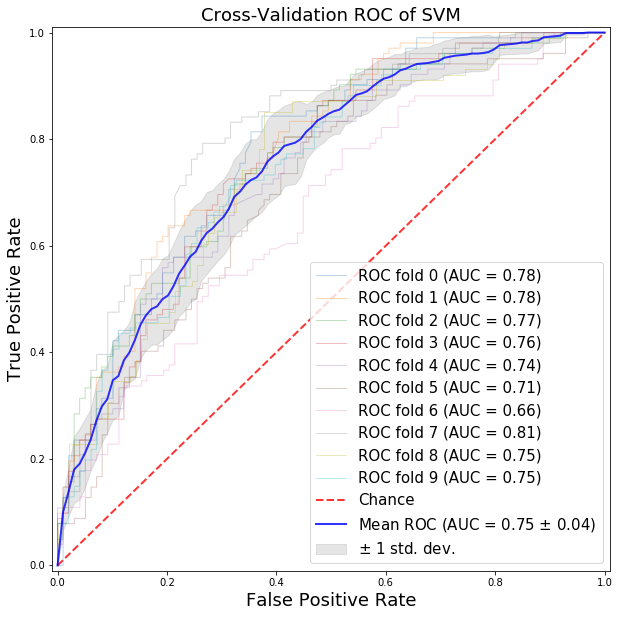

In [62]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp
# Run classifier with crossvalidation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(x_tfidf, y):
    probas_ = classifier.fit(x_tfidf[train], y[train]).predict_proba(x_tfidf[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of SVM',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()    

C:\Users\Pratik\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


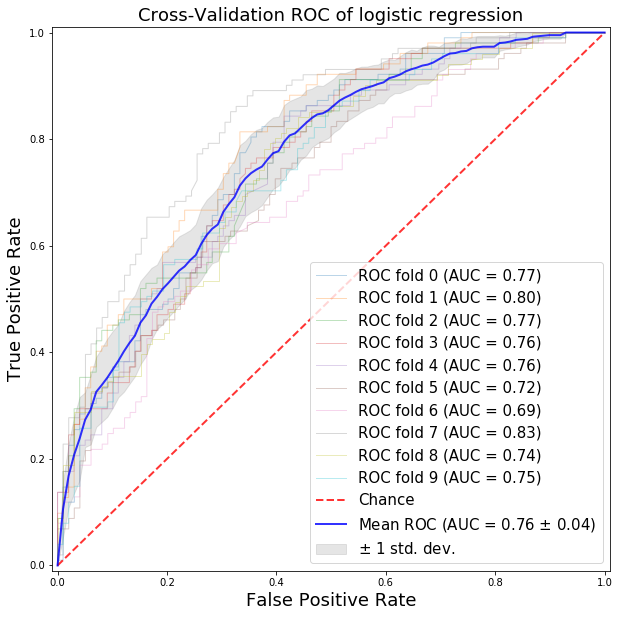

In [63]:

classifier1 = LogisticRegression()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(x_tfidf, y):
    probas_ = classifier1.fit(x_tfidf[train], y[train]).predict_proba(x_tfidf[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of logistic regression',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()  

C:\Users\Pratik\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


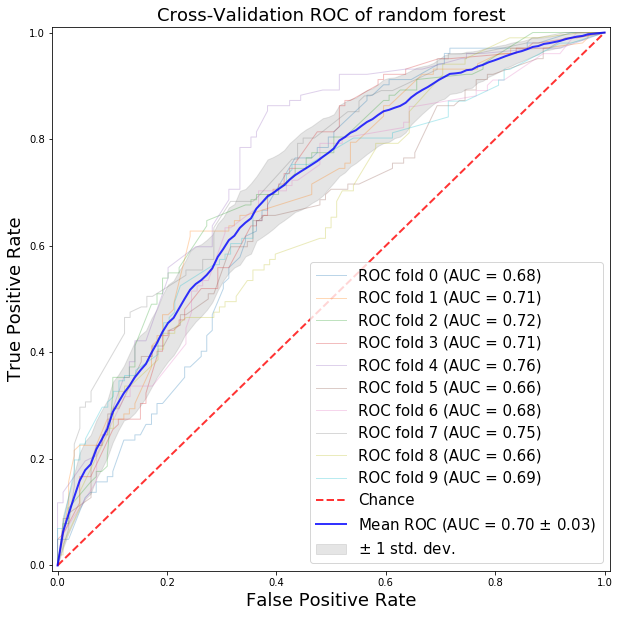

In [64]:

classifier2 = RandomForestClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(x_tfidf, y):
    probas_ = classifier2.fit(x_tfidf[train], y[train]).predict_proba(x_tfidf[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of random forest',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()  

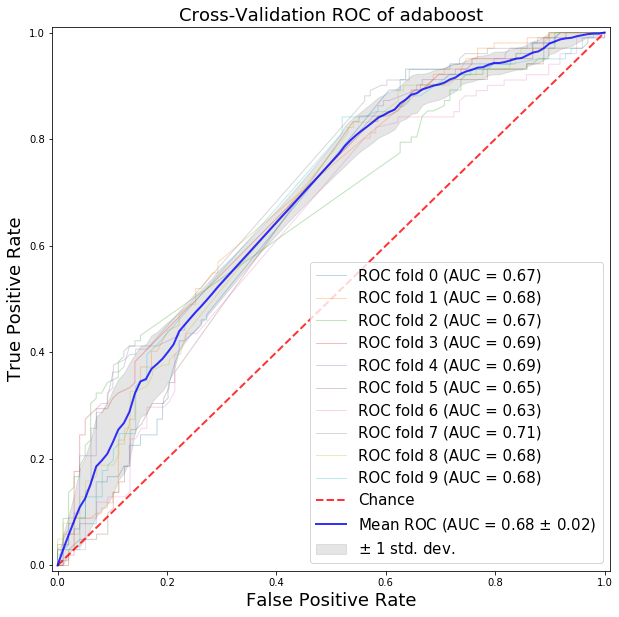

In [66]:
from sklearn.ensemble import AdaBoostClassifier
classifier3 =AdaBoostClassifier(n_estimators=100,random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(x_tfidf, y):
    probas_ = classifier3.fit(x_tfidf[train], y[train]).predict_proba(x_tfidf[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of adaboost',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()  